# **Loan Default Prediction**

## **Problem Definition**

### **The Context:**

 - Why is this problem important to solve?

 > Addressing this problem will simplify the HELOC application procedure, potentially eliminate the flaws derived from human error and bias during the loan application process, and increase the revenue generated or reduce the loss by the bank by limiting the number of bad loan applicants from being approved.

### **The objective:**

 - What is the intended goal?

 > The intent is to build a model that can predict which clients will likely default on their loan and to provide the most important features that are used as the model's input to make those recommendations.

### **The key questions:**

- What are the key questions that need to be answered?

> 1. What are the most important features that determine whether a client will default on their loan?
> 2. What are the characteristics of clients that have successfully paid off their loan and never defaulted?
> 3. Is there a threshold amount to how much we should lend per applicant based on certain variables?


### **The problem formulation**:

- What is it that we are trying to solve using data science?

> We are using data science to address a classification problem that mathematically computes good applicants (0) from bad applicants (1) through logistic regression with a sigmoid activation function. We also determine the key attributes in that calculation by assessing the weighting of each variable in that calculation.  

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from seaborn.axisgrid import Grid

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [ ]:
path = "/content/drive/MyDrive/Capstone/hmeq.csv"
df= pd.read_csv(path)

## Summary Statistics

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
#There are a total of 5960 rows and 13 columns in this dataset

df.shape

(5960, 13)

In [ ]:
#All columns except for "BAD" and "LOAN" have null entries

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
#There are noticeable outliers in this dataset

df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


In [ ]:
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [ ]:
df.duplicated().sum()

0

- Observations from Summary Statistics:
> - There are entries with null values in some attributes.
> - There are outliers present in the dataset (most notable for house values, number of inquiries, number of credit lines, and debt-to-income ratio)
> - 75% of the dataset population have zero derogatory/delinquent reports
> - The loan amount provided ranges from 1,100 to 89,900.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
>* The loan value ranges from 1,100 - $89,900.
2. How does the distribution of years at present job "YOJ" vary across the dataset?
>* The distribution is clearly skewed to the right as the number of individuals decline as the YOJ value increases. This is consistent across all job types.
3. How many unique categories are there in the REASON variable?
>* There are only 2 unique categories: "DebtCon" (Debt consolidation) and "HomeImp" (Home improvement).
4. What is the most common category in the JOB variable?
>* The most common category in the JOB variable is "Other" which represents 42% of the dataset.
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
>* No. While it nominally appears that more defaults have occurred due to the reason 'DebtCon', one also has to consider that 69% of applicants listed debt consolidation within the dataset.
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
>* No. The distribution of data is relatively the same across both default and non-default loans.
7. Is there a correlation between the value of the property and the loan default rate?
>* There is a very small, negative correlation between the property value and loan default rate which is -0.03.
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?
>* No. The distribution of loans that default against mortgage amounts is relatively the same as those who do not default. As an example, 80% of loans that do not default have a mortgage amount of less than 100k compared to 82% for the same mortgage bucket amount.

### **Univariate Analysis**


In [ ]:
#Checks the categorical columns for its unique values and their proportion to the total data

category_column = ['BAD', 'REASON', 'JOB']

for column in category_column:
  print(df[column].value_counts(1))
  print("-"*50)

0    0.800503
1    0.199497
Name: BAD, dtype: float64
--------------------------------------------------
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
--------------------------------------------------
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
--------------------------------------------------


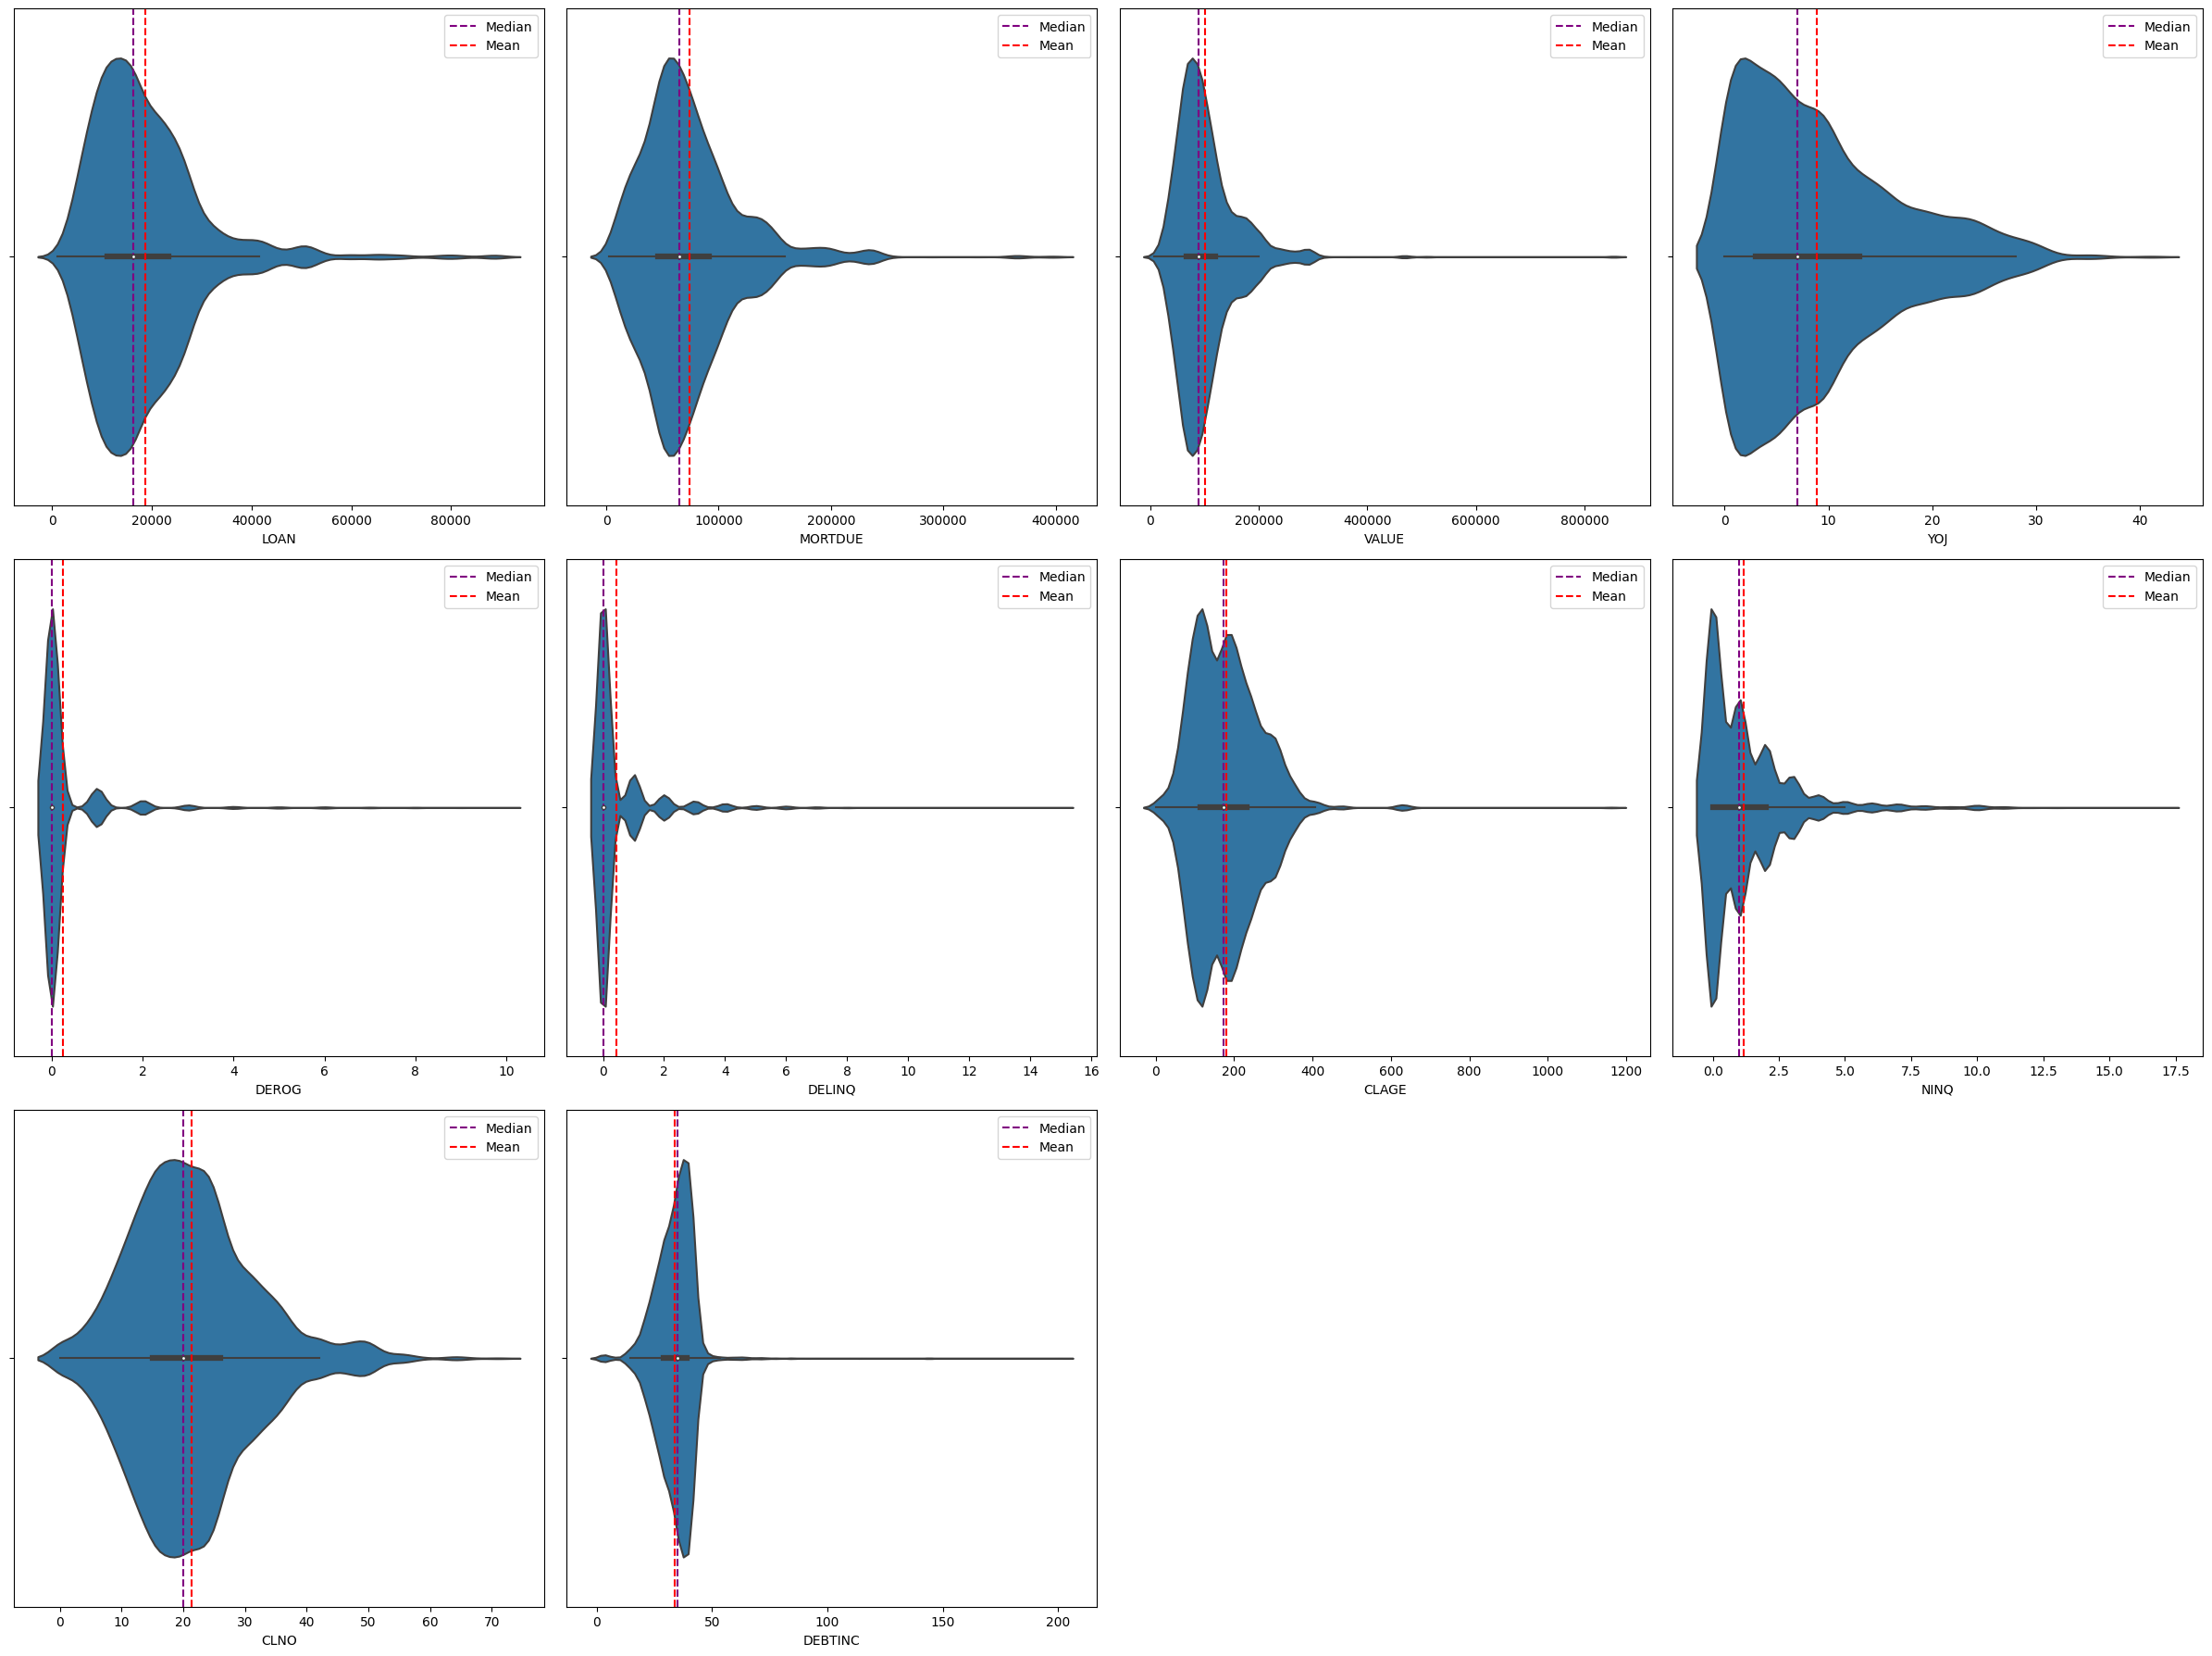

In [ ]:
#Purpose is to generate a violin plot for each numerical/continuous column

warnings.filterwarnings("ignore", category=UserWarning)

#Defines a function to create a 3x4 grid of violin plots
def consolidated_violin_plot(df, column_names):
  num_plots = len(column_names)
  num_rows = 3
  num_cols = 4

  fig, axes = plt.subplots(num_rows, num_cols, figsize = (24,18))
#-------
#Assigns the violin plot to each row/column in the subplot
  for i, column_name in enumerate(column_names):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row,col]
#-------
#Creates the actual violin plot
    sns.violinplot(data=df, x=column_name, ax=ax)
    median = df[column_name].median()
    mean = df[column_name].mean()
    ax.axvline(x=median, color = 'purple', linestyle='--', label = 'Median')
    ax.axvline(x=mean, color = 'red', linestyle='--', label = 'Mean')
    ax.legend()
#-------
#Creates the subplot that will contain the individual graphs and removes excess plots
  for i in range(num_plots, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row,col])
#-------
#Displays the subplot
  plt.tight_layout()
  plt.show()
#-------
#Create a variable to list all the continuos attributes to pass as an argument in our function
plot_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
consolidated_violin_plot(df, plot_columns)

Univariate Observations:

* Nearly 20% of the loan population were bad loans
* Approximately 2/3 of the loans were used as a means to consolidate debt with the remaining portion for home improvement
* Loan applicants held the following top 3 known job roles with a significant portion classified as "Other":
>* ProfExe (22%)
>* Office (17%)
>* Mgr (14%)
>* Other (42%)
*There are outliers in all numerical/continuous attributes





### **Bivariate Analysis**

BAD  REASON 
0    DebtCon    0.696956
     HomeImp    0.303044
1    DebtCon    0.652936
     HomeImp    0.347064
Name: REASON, dtype: float64

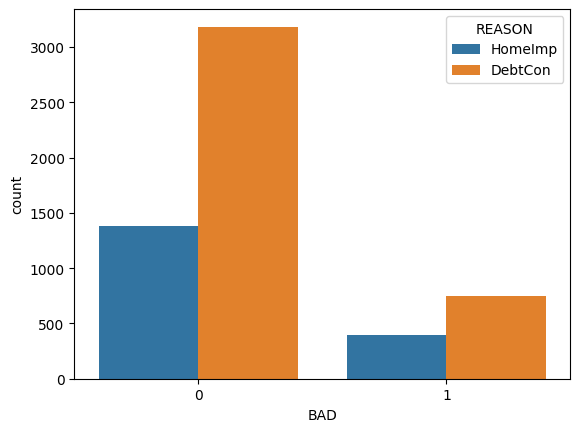

In [ ]:
#Analyzing loan default rates based on the loan reason

sns.countplot(data=df, x='BAD', hue='REASON')
df.groupby('BAD')['REASON'].value_counts(normalize=True)

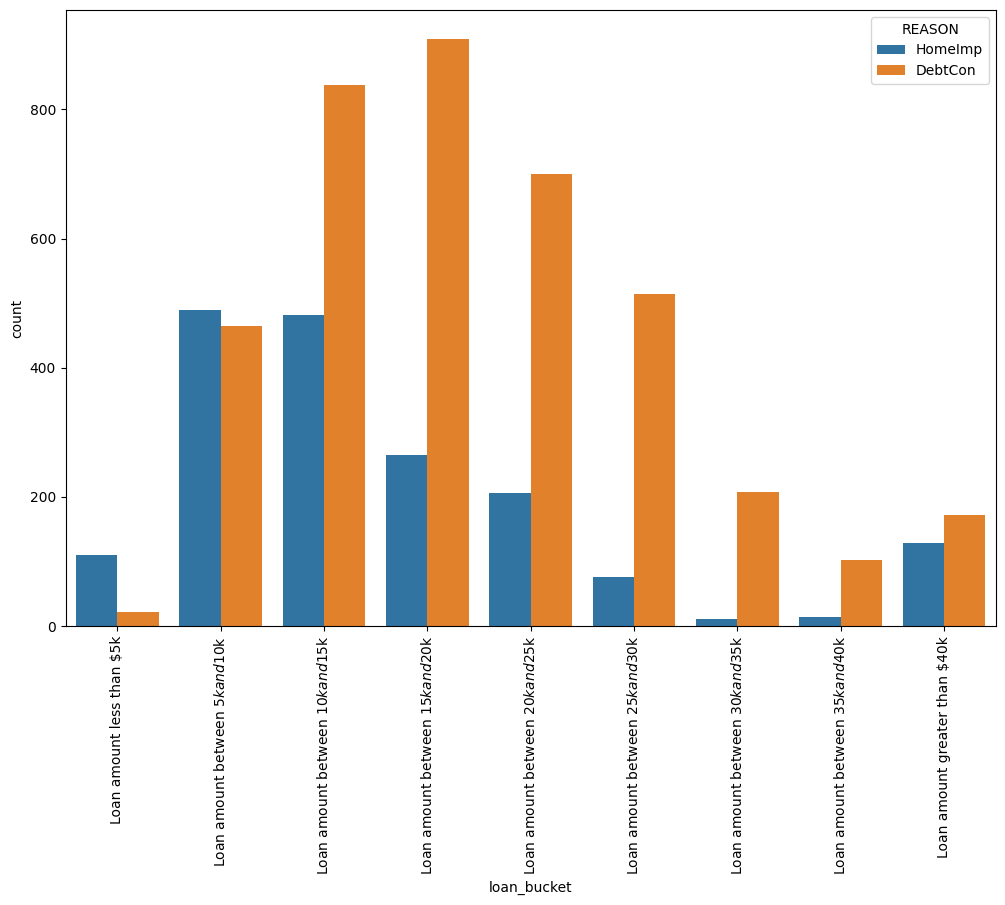

In [ ]:
#Creating a new dataframe attribute called loan_bucket to group the loan values and a variable list to sort the groups for further analysis

loan_bucket=[]

for value in df['LOAN']:
  if value < 5000:
    loan_bucket.append("Loan amount less than $5k")
  elif 5000 <= value < 10000:
    loan_bucket.append("Loan amount between $5k and $10k")
  elif 10000 <= value < 15000:
    loan_bucket.append("Loan amount between $10k and $15k")
  elif 15000 <= value < 20000:
    loan_bucket.append("Loan amount between $15k and $20k")
  elif 20000 <= value < 25000:
    loan_bucket.append("Loan amount between $20k and $25k")
  elif 25000 <= value < 30000:
    loan_bucket.append("Loan amount between $25k and $30k")
  elif 30000 <= value < 35000:
    loan_bucket.append("Loan amount between $30k and $35k")
  elif 35000 <= value < 40000:
    loan_bucket.append("Loan amount between $35k and $40k")
  elif value >= 40000:
    loan_bucket.append("Loan amount greater than $40k")
  else:
    loan_bucket.append(None)

df['loan_bucket'] = loan_bucket

loan_order = [
    "Loan amount less than $5k",
    "Loan amount between $5k and $10k",
    "Loan amount between $10k and $15k",
    "Loan amount between $15k and $20k",
    "Loan amount between $20k and $25k",
    "Loan amount between $25k and $30k",
    "Loan amount between $30k and $35k",
    "Loan amount between $35k and $40k",
    "Loan amount greater than $40k"
]

#Graphing the applicants based on loan bucket and reason

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='loan_bucket', hue='REASON', order=loan_order)
plt.xticks(rotation=90);


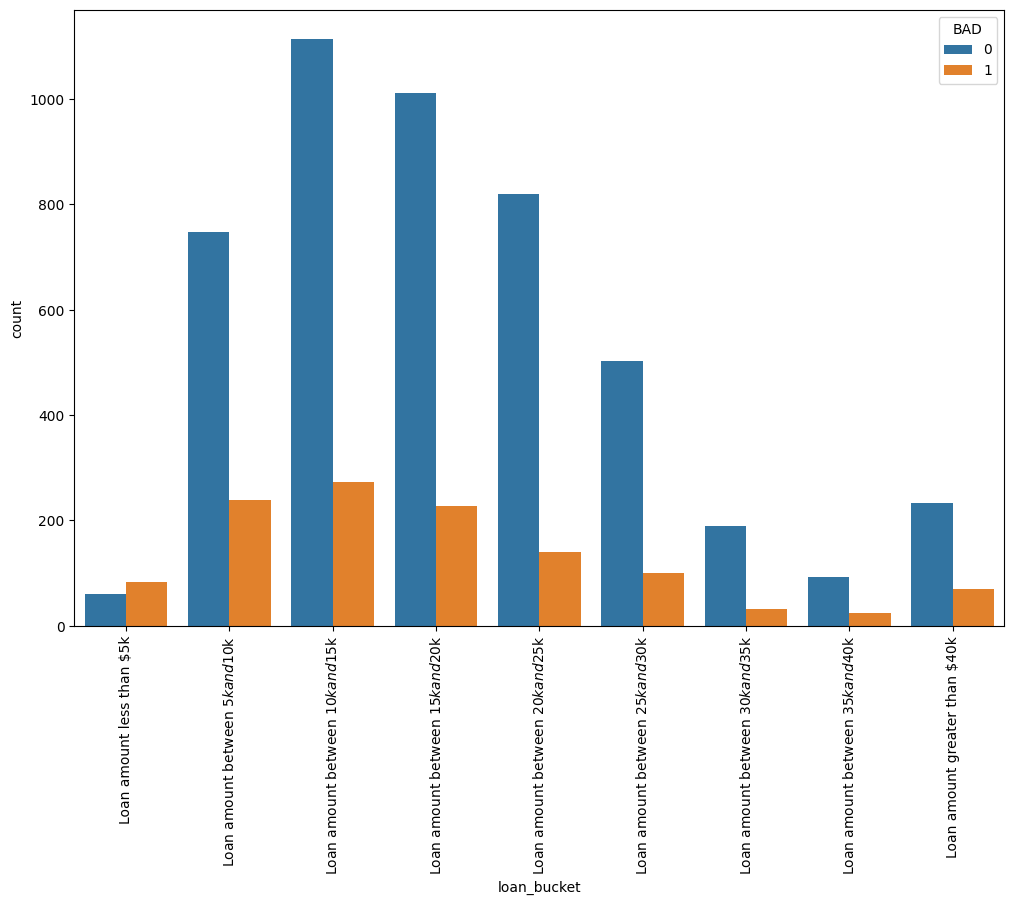

In [ ]:
#Analyzing the loan default volumes based on loan bucket amounts

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='loan_bucket', hue='BAD', order=loan_order)
plt.xticks(rotation=90);

BAD  mortgage_bucket                        
0    Mortgage amount between $50k and $100k     0.515715
     Mortgage amount less than $50k             0.283322
     Mortgage amount between $100k and $150k    0.150493
     Mortgage amount between $150k and $200k    0.030741
     Mortgage amount between $200k and $250k    0.017665
     Mortgage amount between $350k and $400k    0.002065
1    Mortgage amount between $50k and $100k     0.456140
     Mortgage amount less than $50k             0.364728
     Mortgage amount between $100k and $150k    0.118190
     Mortgage amount between $150k and $200k    0.040628
     Mortgage amount between $200k and $250k    0.013850
     Mortgage amount between $350k and $400k    0.003693
     Mortgage amount between $250k and $300k    0.001847
     Mortgage amount between $300k and $350k    0.000923
Name: mortgage_bucket, dtype: float64

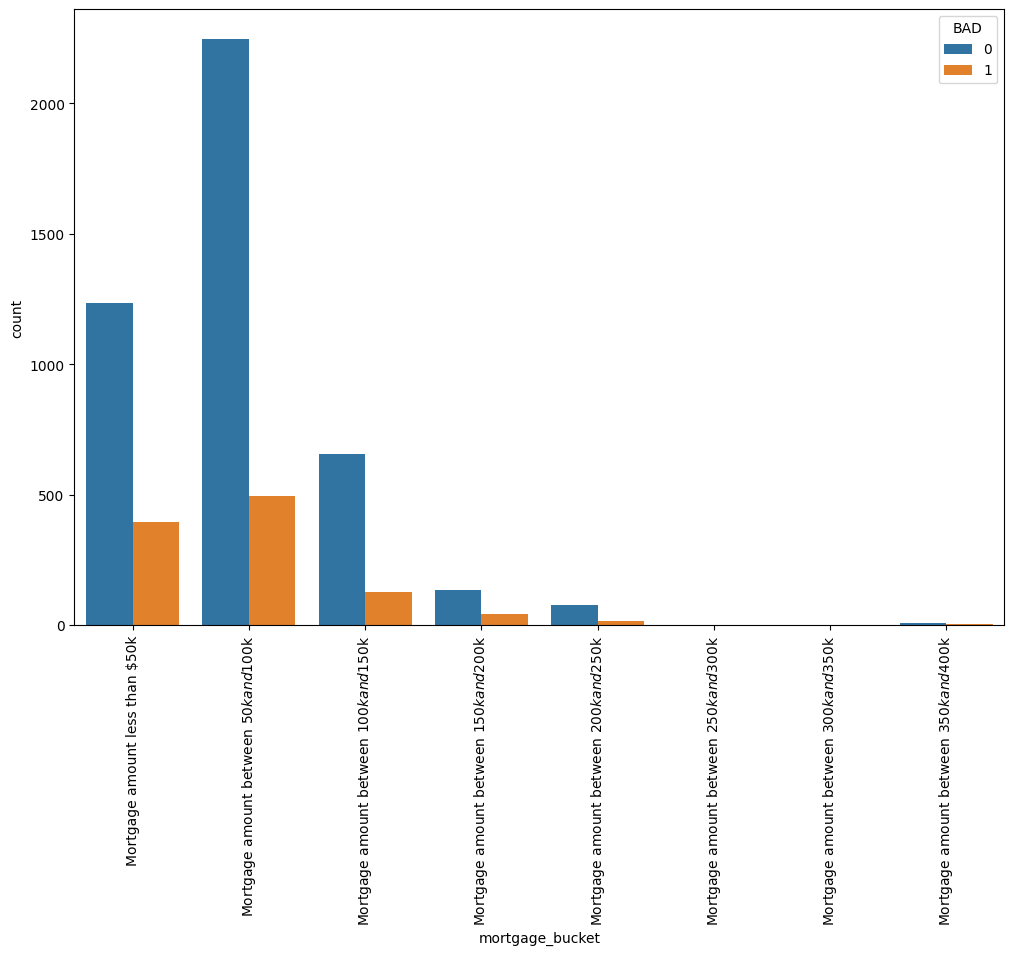

In [ ]:
#Creating a new dataframe attribute called mortgage_bucket to group the mortgage values and a variable list to sort the groups for further analysis

mortgage_bucket=[]

for value in df['MORTDUE']:
  if value < 50000:
    mortgage_bucket.append("Mortgage amount less than $50k")
  elif 50000 <= value < 100000:
    mortgage_bucket.append("Mortgage amount between $50k and $100k")
  elif 100000 <= value < 150000:
    mortgage_bucket.append("Mortgage amount between $100k and $150k")
  elif 150000 <= value < 200000:
    mortgage_bucket.append("Mortgage amount between $150k and $200k")
  elif 200000 <= value < 250000:
    mortgage_bucket.append("Mortgage amount between $200k and $250k")
  elif 250000 <= value < 300000:
    mortgage_bucket.append("Mortgage amount between $250k and $300k")
  elif 300000 <= value < 350000:
    mortgage_bucket.append("Mortgage amount between $300k and $350k")
  elif 350000 <= value < 400000:
    mortgage_bucket.append("Mortgage amount between $350k and $400k")
  else:
    mortgage_bucket.append(None)

df['mortgage_bucket'] = mortgage_bucket

mortgage_order = [
    "Mortgage amount less than $50k",
    "Mortgage amount between $50k and $100k",
    "Mortgage amount between $100k and $150k",
    "Mortgage amount between $150k and $200k",
    "Mortgage amount between $200k and $250k",
    "Mortgage amount between $250k and $300k",
    "Mortgage amount between $300k and $350k",
    "Mortgage amount between $350k and $400k",
]

#Graphing the applicants based on mortgage bucket and loan default

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='mortgage_bucket', hue='BAD', order=mortgage_order)
plt.xticks(rotation=90);

#Analyzing the ratio of applicants defaulting on loans based on mortgage amount relative to non-defaults using groupby and value_counts function
df.groupby('BAD')['mortgage_bucket'].value_counts(normalize=True)

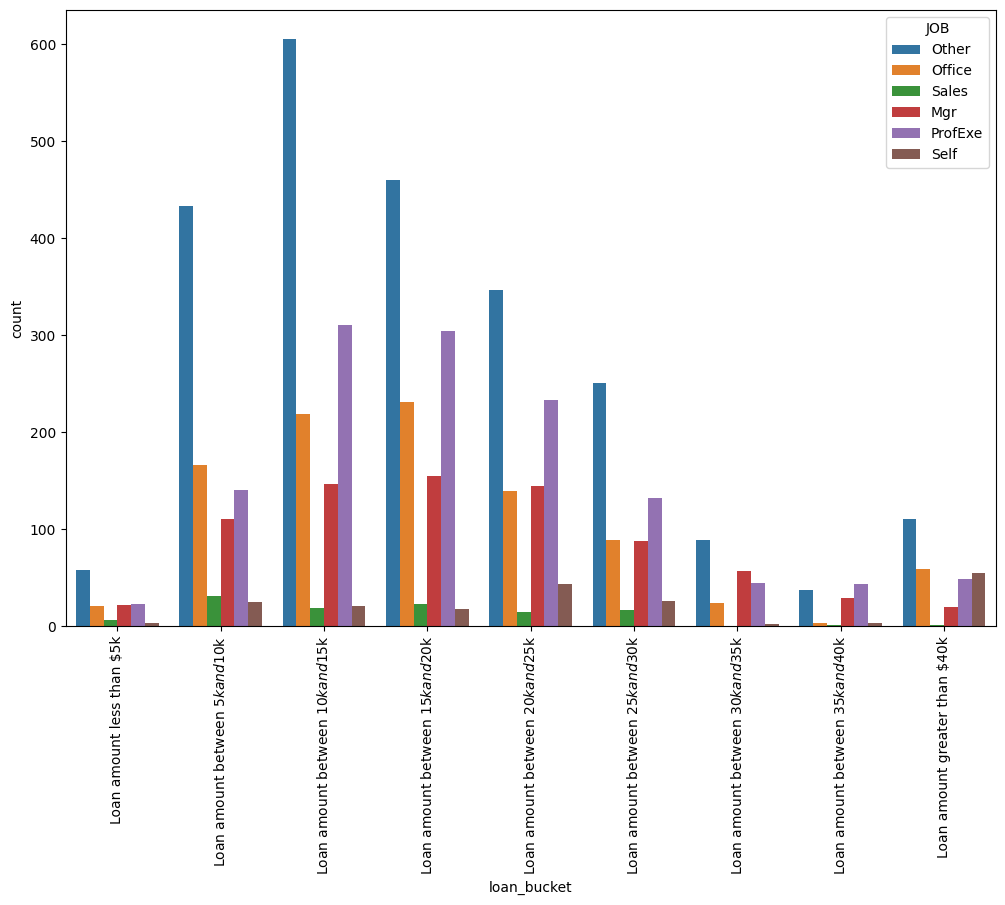

In [ ]:
#Analyzing loan amounts taken out by job category

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='loan_bucket', hue='JOB', order=loan_order)
plt.xticks(rotation=90);

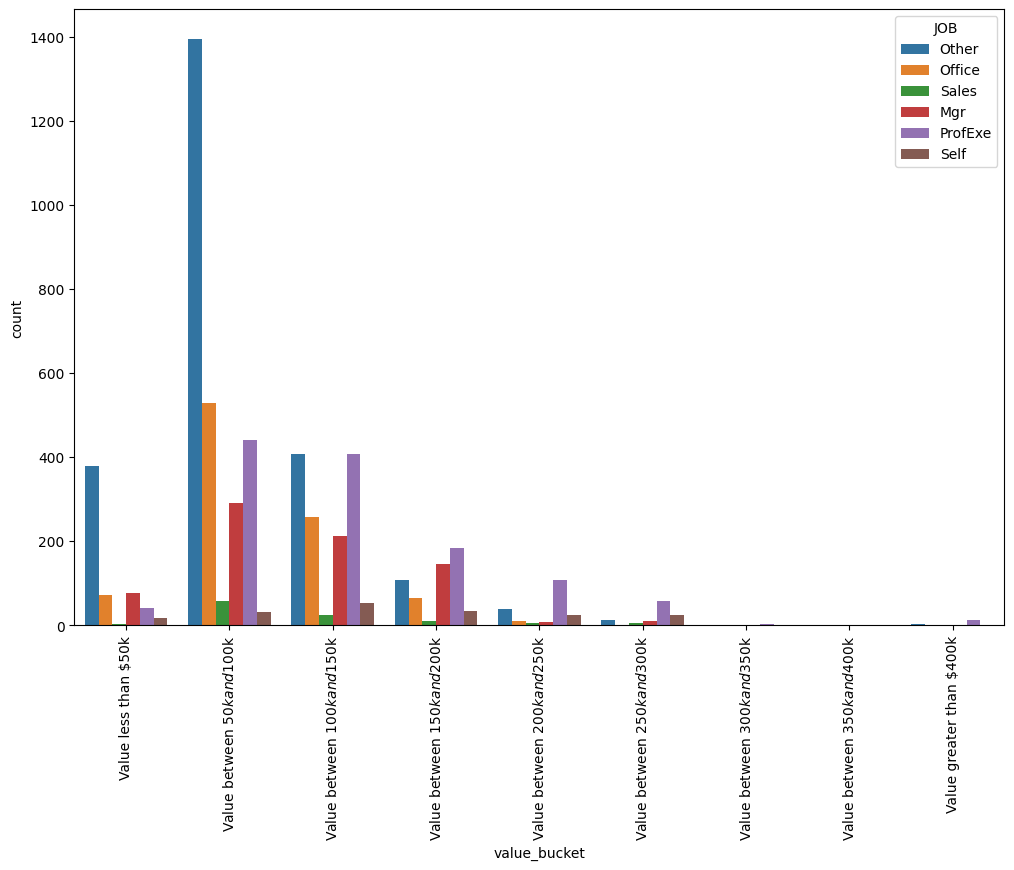

In [ ]:
#Creating a new dataframe attribute called value_bucket to group the property values and a variable list to sort the groups for further analysis

value_bucket=[]

for value in df['VALUE']:
  if value < 50000:
    value_bucket.append("Value less than $50k")
  elif 50000 <= value < 100000:
    value_bucket.append("Value between $50k and $100k")
  elif 100000 <= value < 150000:
    value_bucket.append("Value between $100k and $150k")
  elif 150000 <= value < 200000:
    value_bucket.append("Value between $150k and $200k")
  elif 200000 <= value < 250000:
    value_bucket.append("Value between $200k and $250k")
  elif 250000 <= value < 300000:
    value_bucket.append("Value between $250k and $300k")
  elif 300000 <= value < 350000:
    value_bucket.append("Value between $300k and $350k")
  elif 350000 <= value < 400000:
    value_bucket.append("Value between $350k and $400k")
  elif value >= 400000:
   value_bucket.append("Value greater than $400k")
  else:
    value_bucket.append(None)

df['value_bucket'] = value_bucket

value_order = [
    "Value less than $50k",
    "Value between $50k and $100k",
    "Value between $100k and $150k",
    "Value between $150k and $200k",
    "Value between $200k and $250k",
    "Value between $250k and $300k",
    "Value between $300k and $350k",
    "Value between $350k and $400k",
    "Value greater than $400k"
]

#Analyzing property values by job category

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='value_bucket', hue='JOB', order=value_order)
plt.xticks(rotation=90);

JOB      BAD
Mgr      0      0.766623
         1      0.233377
Office   0      0.868143
         1      0.131857
Other    0      0.768007
         1      0.231993
ProfExe  0      0.833856
         1      0.166144
Sales    0      0.651376
         1      0.348624
Self     0      0.699482
         1      0.300518
Name: BAD, dtype: float64

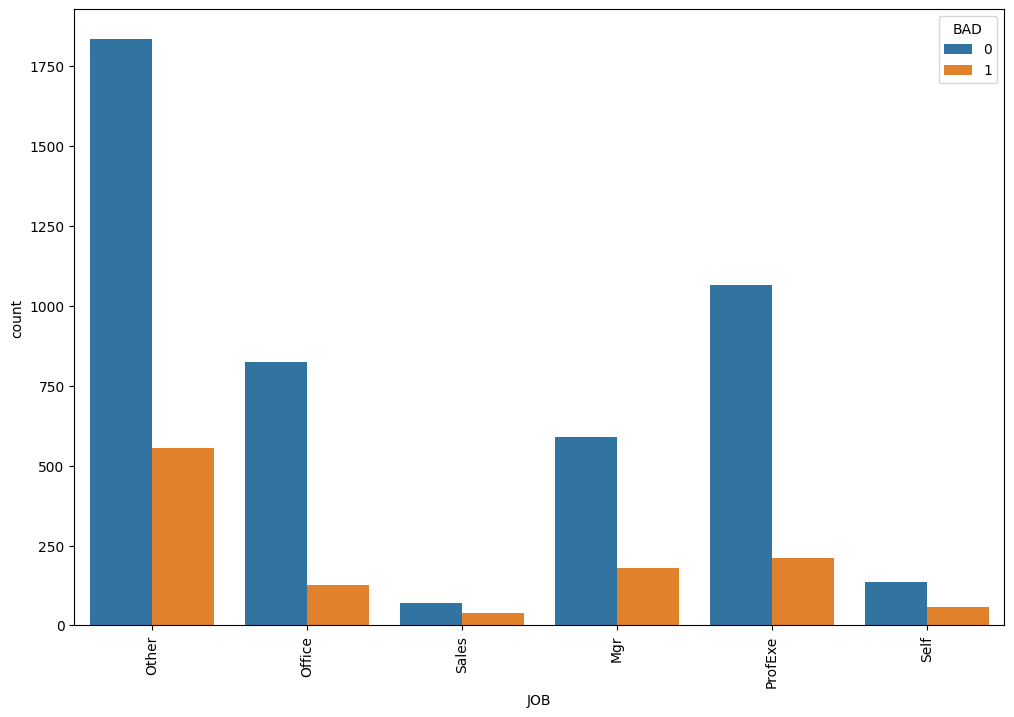

In [ ]:
#Analyzing loan default rates by job category

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='JOB', hue='BAD')
plt.xticks(rotation=90);
df.groupby('JOB')['BAD'].value_counts(normalize=True)

0.17052682455753387


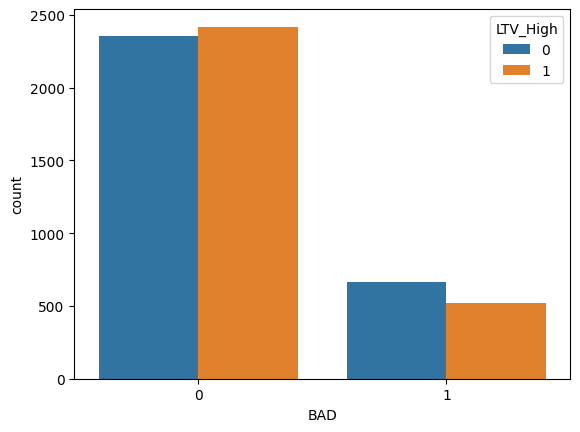

In [ ]:
#Creating a new dataframe attribute to assess loan to value ratio with binary 0/1 outcome using the median as a threshold

df['LTV'] = df['LOAN']/df['VALUE']
print(df['LTV'].median())

LTV_High = []
for value in df['LTV']:
  if value > 0.17:
    LTV_High.append('1')
  else:
    LTV_High.append('0')

df['LTV_High'] = LTV_High

#Assessing if there is a correlation between a higher LTV and loan defaults

sns.countplot(data=df, x='BAD', hue = 'LTV_High');

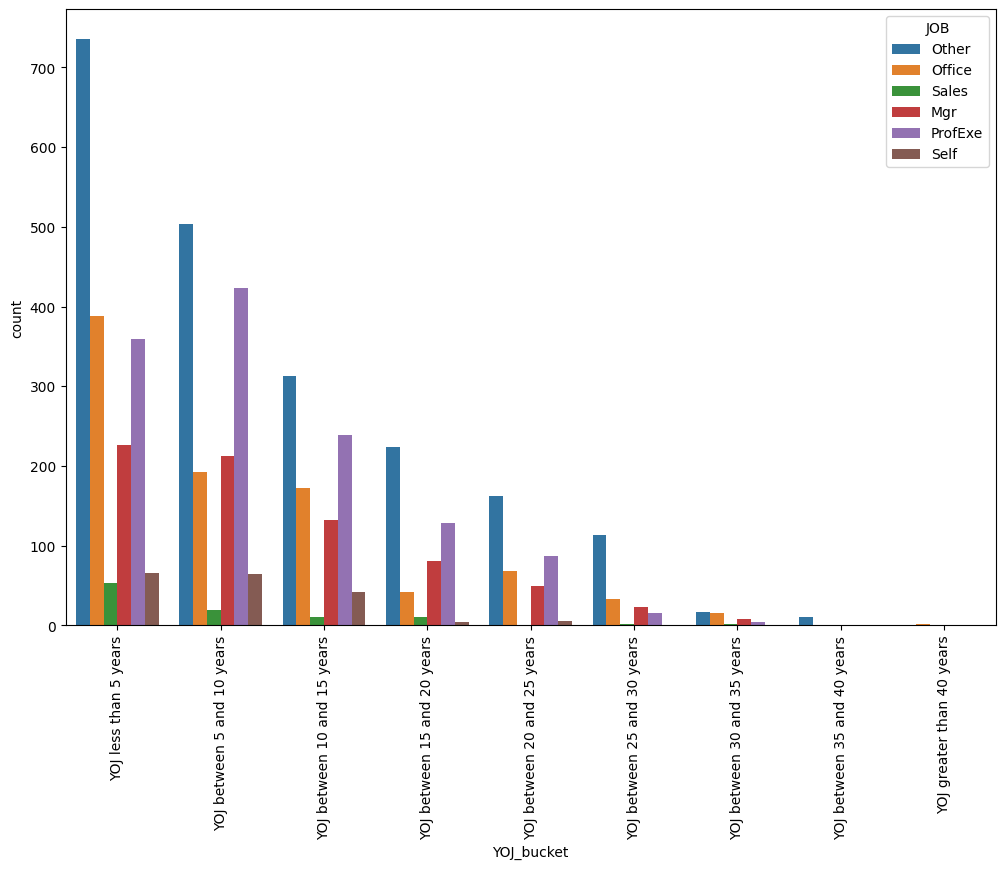

In [ ]:
#Creating a new dataframe attribute called YOJ_bucket to group the YoJ values and a variable list to sort the groups for further analysis

YOJ_bucket=[]

for value in df['YOJ']:
  if value < 5:
    YOJ_bucket.append("YOJ less than 5 years")
  elif 5 <= value < 10:
    YOJ_bucket.append("YOJ between 5 and 10 years")
  elif 10 <= value < 15:
   YOJ_bucket.append("YOJ between 10 and 15 years")
  elif 15 <= value < 20:
    YOJ_bucket.append("YOJ between 15 and 20 years")
  elif 20 <= value < 25:
    YOJ_bucket.append("YOJ between 20 and 25 years")
  elif 25 <= value < 30:
    YOJ_bucket.append("YOJ between 25 and 30 years")
  elif 30 <= value < 35:
    YOJ_bucket.append("YOJ between 30 and 35 years")
  elif 35 <= value < 40:
    YOJ_bucket.append("YOJ between 35 and 40 years")
  elif value >= 40:
   YOJ_bucket.append("YOJ greater than 40 years")
  else:
    YOJ_bucket.append(None)

df['YOJ_bucket'] = YOJ_bucket

YOJ_order = [
    "YOJ less than 5 years",
    "YOJ between 5 and 10 years",
    "YOJ between 10 and 15 years",
    "YOJ between 15 and 20 years",
    "YOJ between 20 and 25 years",
    "YOJ between 25 and 30 years",
    "YOJ between 30 and 35 years",
    "YOJ between 35 and 40 years",
    "YOJ greater than 40 years"
]

#Analyzing YOJ values by job category

plt.figure(figsize=(12,8))
sns.countplot(data=df, x='YOJ_bucket', hue = 'JOB', order = YOJ_order)
plt.xticks(rotation=90);

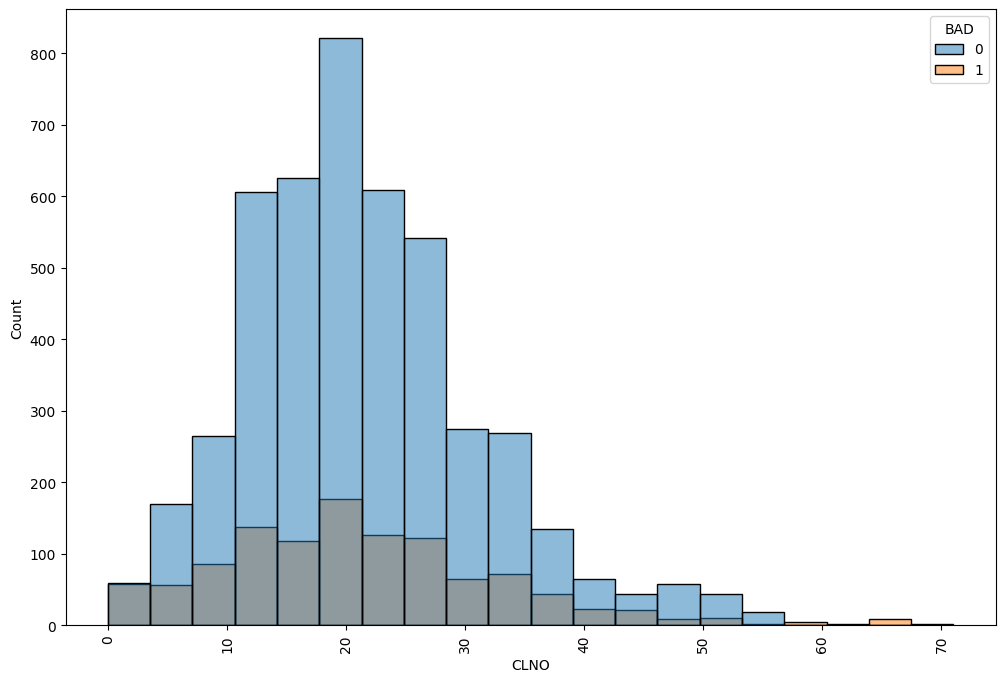

In [ ]:
#Analyzing the range of open credit lines to default loans

plt.figure(figsize=(12,8))
sns.histplot(data=df, x='CLNO', hue = 'BAD', bins = 20)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks(rotation=90);

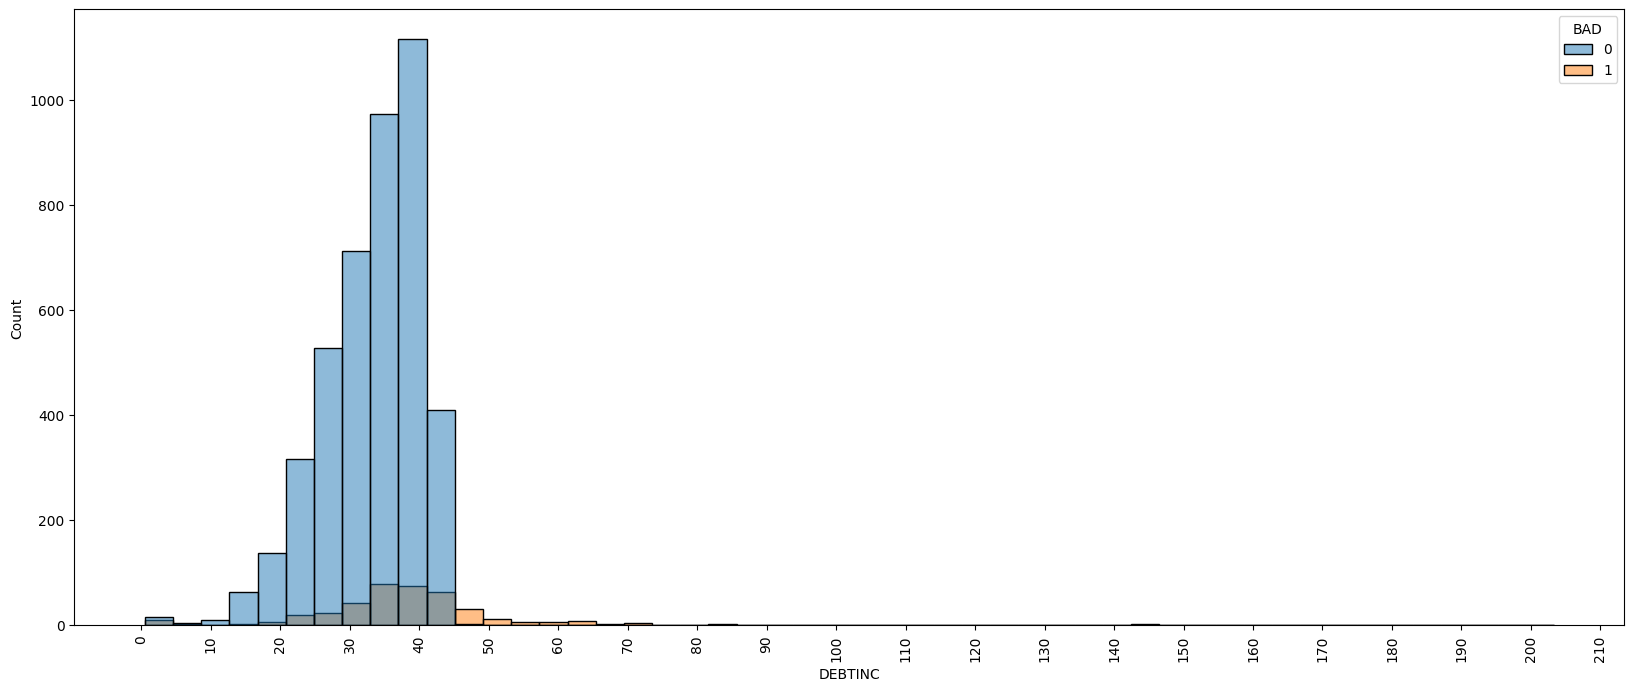

In [ ]:
#Analyzing the range of debt-to-income ratio to default loans

plt.figure(figsize=(20,8))
sns.histplot(data=df, x='DEBTINC', hue = 'BAD', bins = 50)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(10))
plt.xticks(rotation=90);

Bivariate Analysis:


* Professional executives and managers tend to have higher value properties relative to other job professions.
* Having a higher loan-to-value (LTV) ratio did not indicate a higher chance of defaulting surprisingly.
* Home improvement loans typically have a lower normal distribution loan amount than debt consolidation loans.
* A debt-to-income of roughly 45% is a leading factor for bad loans.
* If the number of credit lines pass 60, the applicant is also likely to default on their loans.



In [ ]:
#Removes the additional generated columns from EDA

df.drop(columns=['loan_bucket','mortgage_bucket','value_bucket', 'LTV', 'LTV_High', 'YOJ_bucket'], inplace=True)

### **Multivariate Analysis**

<Axes: >

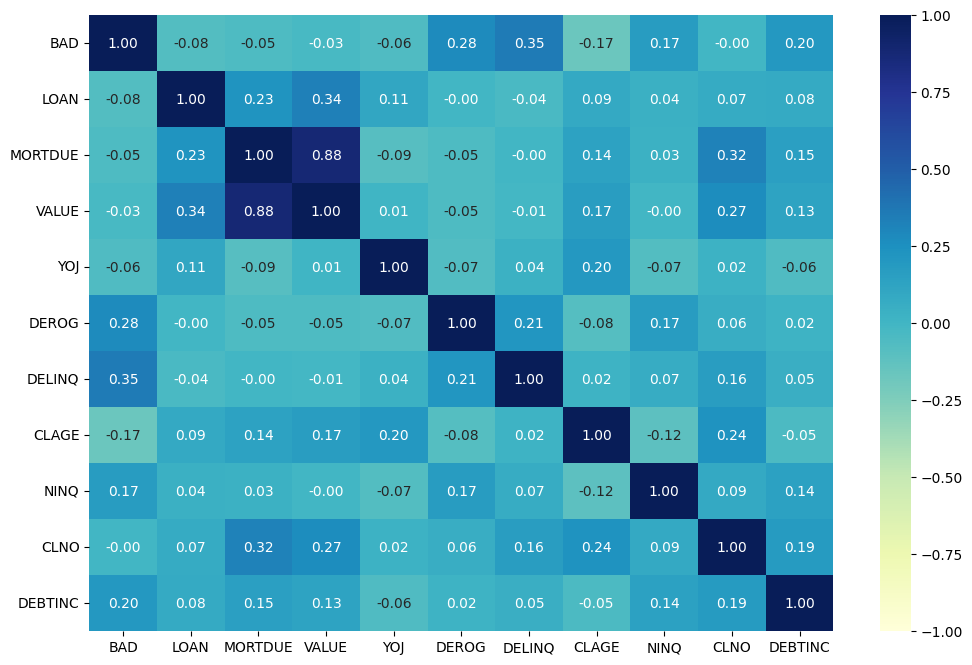

In [ ]:
# Creating a correlation matrix for numeric attributes

correlation = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap = 'YlGnBu', vmin=-1, vmax=1)

Multivariate Analysis:


* The top 5 correlated factors to bad loans based on the correlation matrix are:
>* Delinquent reports (0.35)
>* Derogatory reports (0.28)
>* Debt-to-income (0.20)
>* Age of Credit Line (-0.17)
>>* A higher credit line age could mean less of a chance for a bad loan and vice-versa.
>* Number of Credit Inquiries (0.17)
* Derogatory and delinquent reports are positively correlated to the number of of inquiries (0.17) and number of credit lines (0.16), respectively, indicating potential indirect variables that contribute to a bad loan.



## Treating Outliers

While there are outliers present in our dataset, it is best to leave them as-is because they are a representation of the applicants' information and do not appear to be generated due to mistakes or errors.

## Treating Missing Values

In [ ]:
#Fills in NaN values for categorical variables using the mode

df['REASON'].fillna(df['REASON'].mode().iloc[0], inplace=True)
df['JOB'].fillna(df['JOB'].mode().iloc[0], inplace=True)

#Fills in NaN values for continuous variables using the median
df['MORTDUE'].fillna(df['MORTDUE'].median(), inplace=True)
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)
df['YOJ'].fillna(df['YOJ'].median(), inplace=True)
df['DEROG'].fillna(df['DEROG'].median(), inplace=True)
df['DELINQ'].fillna(df['DELINQ'].median(), inplace=True)
df['CLAGE'].fillna(df['CLAGE'].median(), inplace=True)
df['NINQ'].fillna(df['NINQ'].median(), inplace=True)
df['CLNO'].fillna(df['CLNO'].median(), inplace=True)
df['DEBTINC'].fillna(df['DEBTINC'].median(), inplace=True)


In [ ]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?
>* Delinquent and derogatory reports are the highest positively correlated factors to identifying loan defaults.
>* Higher loan amounts are not indicative of higher default amounts.
>* 69% of loans are requested for debt consolidation and those loans typically carry higher amounts than loans for home improvement.
>* Individuals with open credit lines of 60 and greater as well as those with a debt-to-income ratio of 45% and higher are significantly more likely to default.

## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

### Logistic Regression

In [ ]:
cat_column_names = ['REASON','JOB']

df = pd.get_dummies(
    df,
    columns = cat_column_names,
    drop_first=True
)

In [ ]:
x = df.drop('BAD', axis = 1)
y = df['BAD']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, shuffle=True, random_state=1)

### Decision Tree

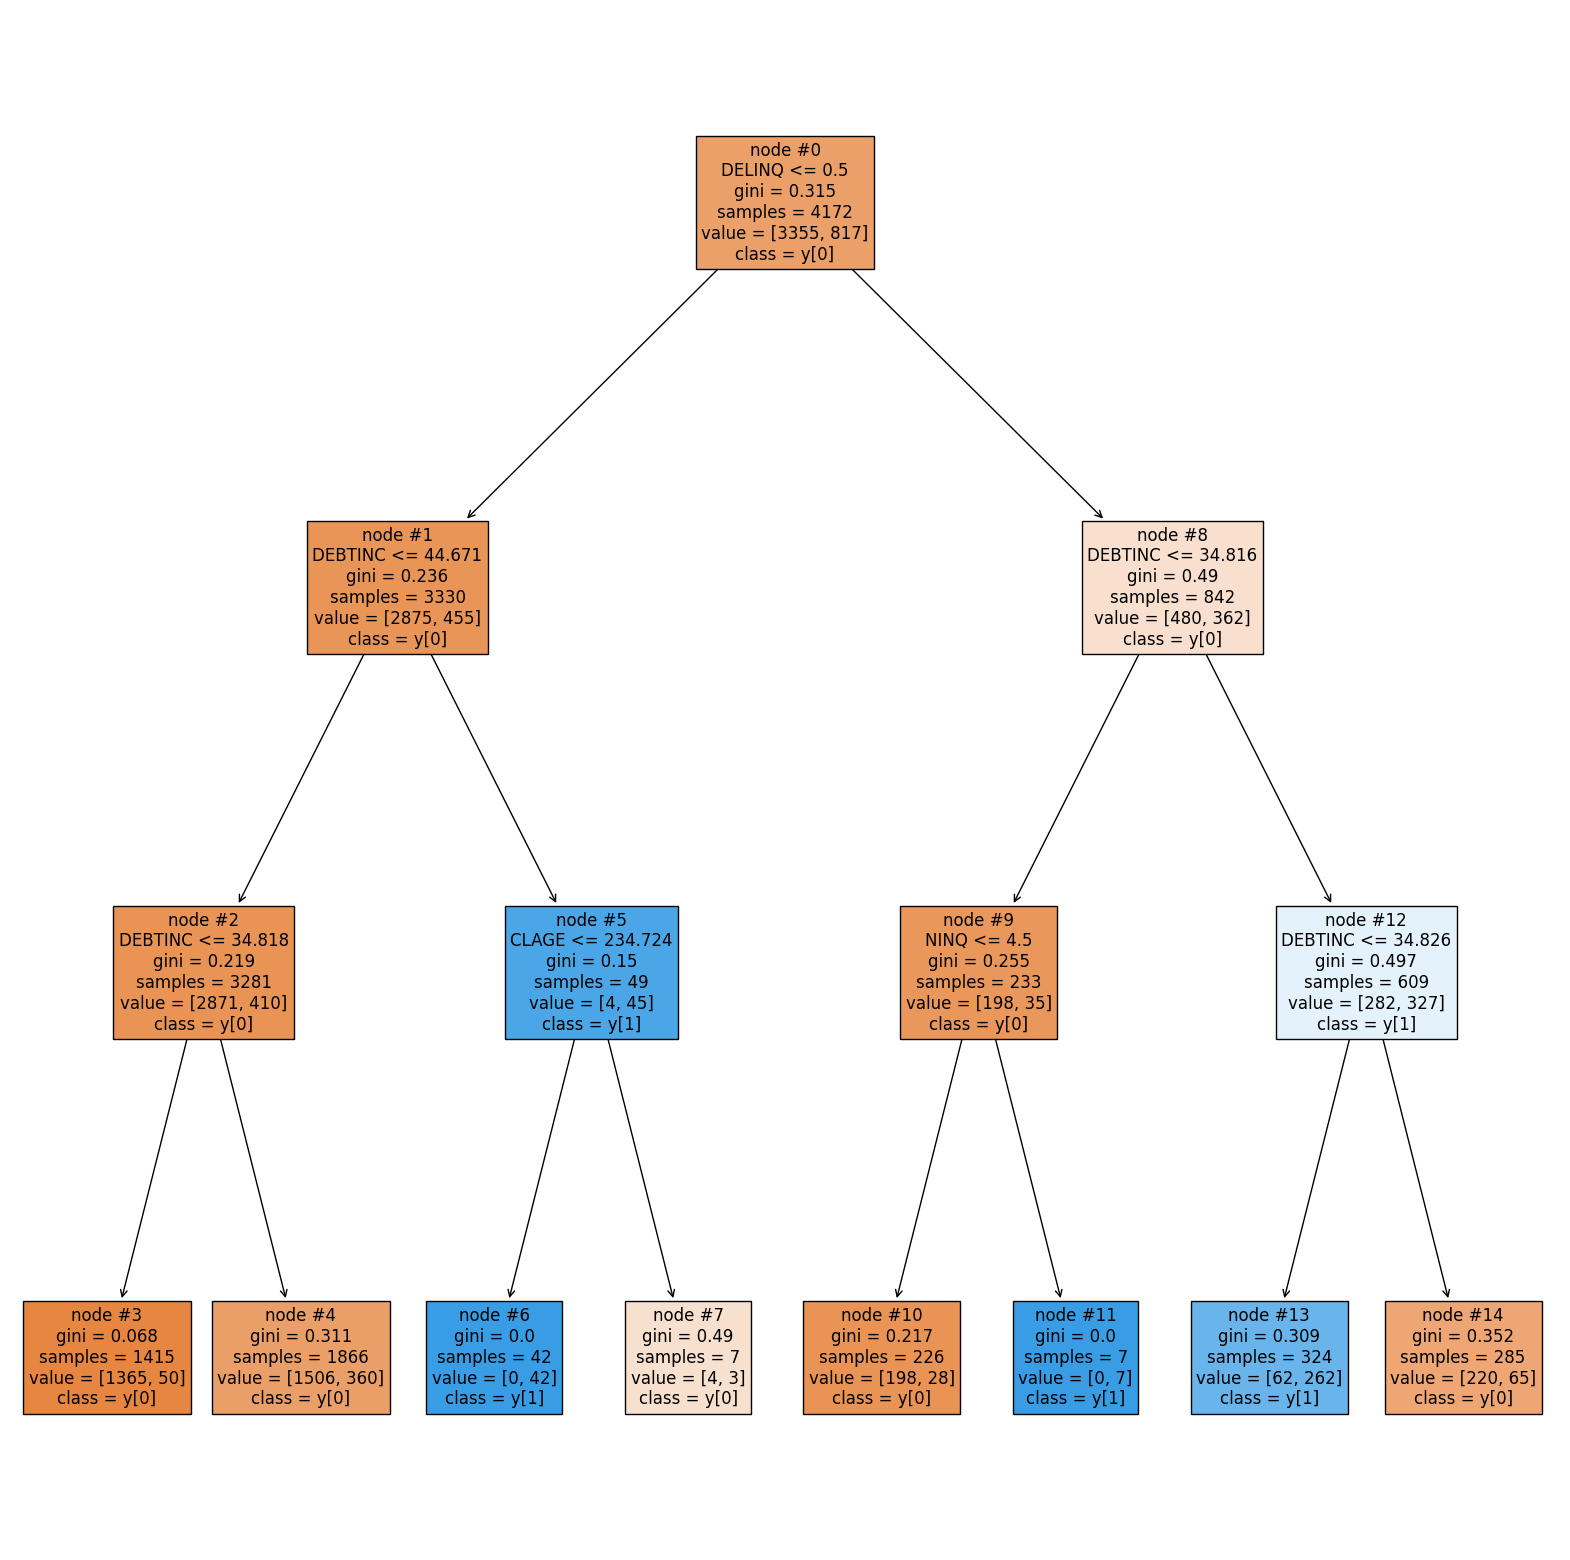

In [ ]:
#Assigning the features variable to the list of columns used as input to the model which will be used to pass an argument into the tree classifier visual diagram
features = list(x.columns)

#Fits the visualizer with the dataset
dt_classifier_visualize = DecisionTreeClassifier(random_state = 1, max_depth = 3)
dt_classifier_visualize.fit(x_train, y_train)

#Graphs the visualizer to a tree diagram which visually describes the thought process of how it classifies whether a potential customer will be converted
plt.figure(figsize=(20,20))
tree.plot_tree(dt_classifier_visualize, feature_names = features, filled = True, fontsize = 12, node_ids = True, class_names = True);

In [ ]:
#Alternative way of viewing the above tree diagram

print(tree.export_text(dt_classifier_visualize, feature_names = features, show_weights = True))

|--- DELINQ <= 0.50
|   |--- DEBTINC <= 44.67
|   |   |--- DEBTINC <= 34.82
|   |   |   |--- weights: [1365.00, 50.00] class: 0
|   |   |--- DEBTINC >  34.82
|   |   |   |--- weights: [1506.00, 360.00] class: 0
|   |--- DEBTINC >  44.67
|   |   |--- CLAGE <= 234.72
|   |   |   |--- weights: [0.00, 42.00] class: 1
|   |   |--- CLAGE >  234.72
|   |   |   |--- weights: [4.00, 3.00] class: 0
|--- DELINQ >  0.50
|   |--- DEBTINC <= 34.82
|   |   |--- NINQ <= 4.50
|   |   |   |--- weights: [198.00, 28.00] class: 0
|   |   |--- NINQ >  4.50
|   |   |   |--- weights: [0.00, 7.00] class: 1
|   |--- DEBTINC >  34.82
|   |   |--- DEBTINC <= 34.83
|   |   |   |--- weights: [62.00, 262.00] class: 1
|   |   |--- DEBTINC >  34.83
|   |   |   |--- weights: [220.00, 65.00] class: 0



In [ ]:
# Fitting the training data to our Decision Tree Classifier model

dt_classifier = DecisionTreeClassifier(random_state = 1)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Creating a confusion matrix score to identify model performance

def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)

    plt.figure(figsize = (8, 5))
    sns.heatmap(cm, annot = True,  fmt = '.2f', xticklabels = ['Loan Default', 'No Default'], yticklabels = ['Loan Default', 'No Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1416
           1       0.71      0.60      0.65       372

    accuracy                           0.87      1788
   macro avg       0.81      0.77      0.79      1788
weighted avg       0.86      0.87      0.86      1788



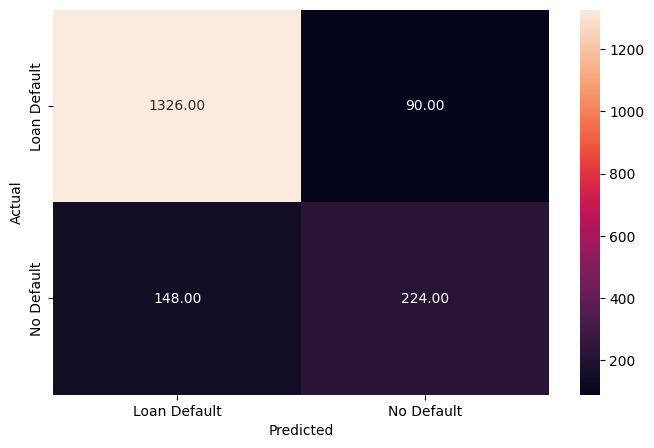

In [ ]:
# Outputting the results of our Decision Tree Classifier model using test dataset
# f1-score is 87%

dt_classifier_pred = dt_classifier.predict(x_test)
metrics_score(y_test, dt_classifier_pred)

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
# Fitting the Random Forest Classifier model to the training dataset

rf_classifier = RandomForestClassifier(random_state = 1)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1416
           1       0.91      0.69      0.79       372

    accuracy                           0.92      1788
   macro avg       0.92      0.84      0.87      1788
weighted avg       0.92      0.92      0.92      1788



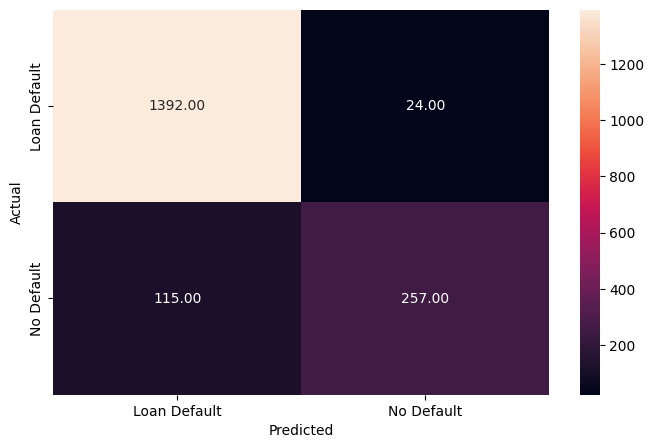

In [ ]:
# Outputting the results of our Random Forest Classifier model using test dataset
# f1-score raised to 0.92

rf_classifier_pred = rf_classifier.predict(x_test)
metrics_score(y_test, rf_classifier_pred)

### **Random Forest Classifier Hyperparameter Tuning**

In [ ]:
#Providing various hyperparameter scenarios for the Random Forest model

rf_tuned = RandomForestClassifier(random_state = 1)
rf_parameters = {
    'n_estimators': [90, 100, 110],
    'max_depth': [None, 5, 7],
    'max_features': [0.7, 0.8, 0.9]
}

In [ ]:
#Using GridSearchCV to identify the best hyperparameter combo

rf_grid_obj = GridSearchCV(rf_tuned, rf_parameters, scoring = 'neg_mean_squared_error', cv=7)
rf_grid_obj.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 5, 7],
                         'max_features': [0.7, 0.8, 0.9],
                         'n_estimators': [90, 100, 110]},
             scoring='neg_mean_squared_error')

In [ ]:
#Fitting the Random Forest model with the best hyperparameter combo to the training dataset

rf_tuned_classifier = rf_grid_obj.best_estimator_
rf_tuned_classifier.fit(x_train, y_train)

RandomForestClassifier(max_features=0.7, random_state=1)

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1416
           1       0.84      0.69      0.76       372

    accuracy                           0.91      1788
   macro avg       0.88      0.83      0.85      1788
weighted avg       0.90      0.91      0.90      1788



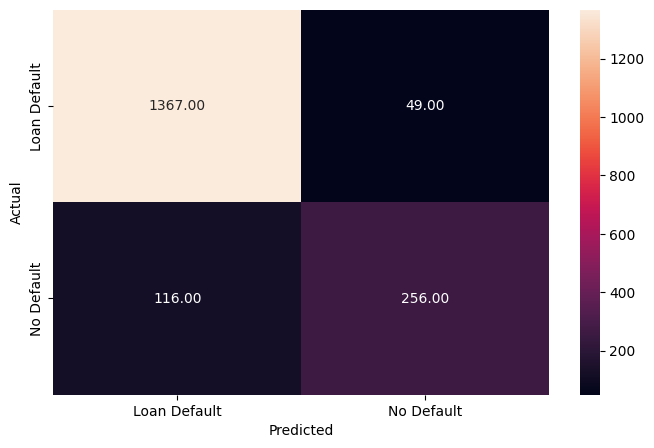

In [ ]:
# Outputting the results of our tuned Random Forest Classifier model using test dataset

rf_tuned_classifier_pred = rf_tuned_classifier.predict(x_test)
metrics_score(y_test, rf_tuned_classifier_pred)

### **Other Models**

In [ ]:
# Fitting the Xtreme Gradient Boosting Classifier model to the training dataset

xgb_classifier = XGBClassifier(random_state = 1)
xgb_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1416
           1       0.88      0.70      0.78       372

    accuracy                           0.92      1788
   macro avg       0.90      0.84      0.86      1788
weighted avg       0.92      0.92      0.91      1788



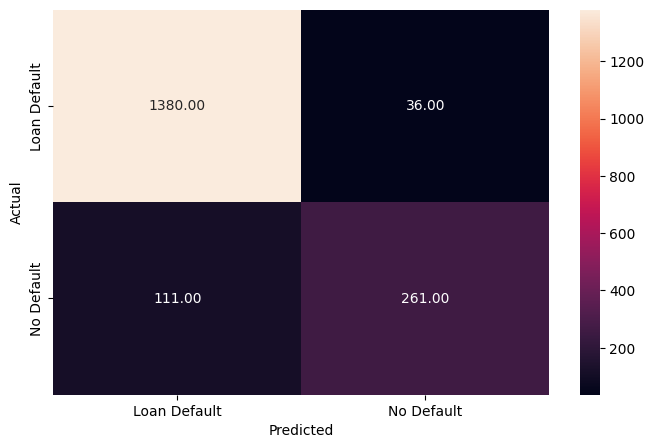

In [ ]:
# Outputting the results of our XTreme Gradient Boosting Classifier model using test dataset
# This model actually slightly underperforms the normal Gradient Boosting Classifier model

xgb_classifier_pred = xgb_classifier.predict(x_test)
metrics_score(y_test, xgb_classifier_pred)

### **Important Features**

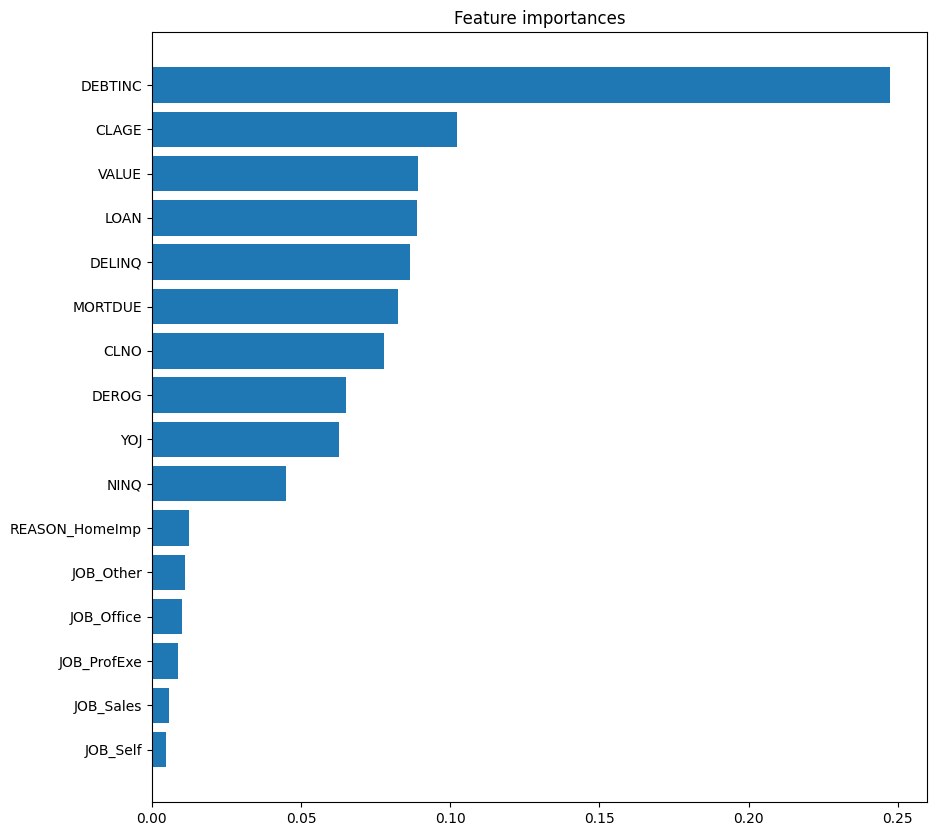

In [ ]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize = (10,10))
plt.title('Feature importances')
plt.barh(range(len(features)), importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices]);

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

>* The three techniques that were performed are:
>>1. Decision Tree
>>> This approach is a supervised learning technique that partitions or splits the data into smaller groups based on its features.
>>2. Random Forest
>>> This approach is an enhanced version of a decision tree approach because it combines multiple decision tree models (through bootstrapping) and takes the majority vote to determine how the data should be classified.  
>>3. XGBoost
>>> This approach is an additive model where each new tree model addresses the errors from the previous iterations.

>* The untuned Random Forest approach performed the best compared to the other models. The criteria with which this is evaluated on is primarily on the f1-score and the nominal values present in the top-right and bottom-left quadrant of the confusion matrix. Ideally we would want to minimize the number of false predictions for no default that end up actually defaulting and to decrease the the number of predicted loan defaults when there ended up being no default.

>* While the parameters we passed into our hyperparameter tuning turned out to generate lackluster results, there is definitely room for improvement. While the f1-score for our Random Forest is 92%, one has to consider that even a small number of loan defaults can generate large losses. So while 92% is certainly better than the 80% accuracy from the traditional way of assessing loan quality in our dataset, we can attempt to continue to improve this by trying out other models and additional hypertuning.






**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

>* Utilizing the random forest approach, the top 3 contributing factors to loan default rates are debt-to-income, credit line age, and the value of the property.
>* Taking only into consideration an applicant's occupation, there is no direct relevance to a person's job and their ability to pay a loan. However, managers and professional executives typically have higher property values which can indirectly mean they are more capable of paying off their loan given that the random forest utilizes that feature as a key indicator for loan default predictions.
>* Having a higher loan-to-value (LTV) rate did not play a role in determining loan defaults.
>* Loans less than $5k appear to have a higher rate of insolvency than other loan amount buckets. As a result, HMEQ should not consider offering microloans.
>* Individuals with a debt-to-income ratio of 45% and higher have a significantly higher chance of defaulting.


**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

>* I propose adopting the untuned Random Forest (RF) model. Compared to the other models used, it was the most accurate in terms of predicting the least incorrect loan default rates. It also has an f1-score of 92% which is fairly dependable.

>* This model can be deployed to production given that it can safely limit loan defaults to occur only 1% of the time which is significantly better than the 20% default rate the company currently experiences.

>* While the untuned RF model is the recommended solution, it is harder to interpret relative to a single decision tree due to the nature of the model structure. An RF model is an ensemble method which combines multiple decision trees which makes it harder to trace each decision tree's decision-making. As a result, while more complex models could be developed to produce even more accurate and precise measures, it would also be more difficult to explain how exactly the model arrived to such conclusions and what the drivers are to produce the desired results. For the RF model, our primary drivers to distinguish between applicants can successfully pay off their loan or default is based on debt-to-income, their oldest line of credit, and the value of their property.  

### **Executive Summary**

Our bank's consumer credit department currently utilizes a labor-intensive, biased, and inaccurate approach to approving HELOC loans for our members. As a result, this process is both slow and has been costly for the bank with nearly 20% of approved loans defaulting. By shifting away from a manual, error-prone method to one that uses a random forest (RF) model, loan defaults can be reduced by 19% and complete execution almost instantantaneously. This efficiency is driven by the model's inherent ensemble use of multiple decision trees as well as it's understanding of the key applicants' features which include debt-to-income, age of their oldest credit line, and the value of the individual's property to reach its conclusion.

While implementing the model can improve our company's loan approval process, it is just as important to understand the profile of bad applicants to help validate our model's results. Individuals that default generally have a debt-to-income ratio of 45% and higher and may also have more than 60 active credit lines open. Bad applicants cannot be determined by their occupation or the number of years present at their company, and having the notion that those features play a large factor introduces bias to our existing methodology. Therefore, while using a RF model can significantly drive down our loan default rates, it is wise to compliment this new methodology with a review of rejected loans to ultimately determine an applicant's standing.


### **Problem and Solution Summary**

Problem:

The bank's consumer credit department utilizes a labor-intensive, biased, and inaccurate approach to approving HELOC loans for the bank's members which result in a slow process and a loan default rate as high as 20%. The bank will obviously lose money by approving so many bad loans and therefore is trying to help reduce this default rate while simultatenously tackling the issues of speed and bias in its current methodology.


Solution:

> Using data science, we can think of this as a classification problem that mathematically computes good applicants (0) from bad applicants (1) through logistic regression with a sigmoid activation function. In doing so, we eliminate bias because we are data dependent and consistent in our approach. The optimal solution involves using a RF model to evaluate whether a member can successfully pay off their loan without defaulting. This solution is both complex enough in that we achieve a loan default rate of only 1% while also simple enough to allow us to understand the way the model arrives at its conclusion. While the model can help significantly reduce the level-of-effort needed to approve or reject a loan with an f1 score of greater than 90%, it is important to stil review those that are being deemed as a bad applicant so that we can compliment the model's decision-making to better assess an applicant's capabilities in paying back their loan.

> Addressing this problem will simplify the HELOC application procedure, potentially eliminate the flaws derived from human error and bias during the loan application process, and increase the revenue generated or reduce the loss by the bank by limiting the number of bad loan applicants from being approved.

### **Recommendations for Implementation**

In order to implement a RF model, one should first consider the limitations that the model has by nature. The model currently only considers the features available within the HELOC dataset. If additional features are introduced, the model should take that new information into consideration and that may reflect in subsequent changes toward the model's overall performance capabilities. Therefore a periodic bi-annual or annual review of the model needs to be incorporated to reduce model risk.

It is also imporant to note that while the model can assist in the loan approval process, one should be cautious in being entirely dependent on the model itself. It is important to also consider the overall profile of good and bad applicants to help supplement the model's decision-making.

For the model developer/owner(s), the key takeaway action is to perform periodic reviews to ensure the model is in good standing. Business analysts should also collaborate with these individuals to perform checks against the model's approval rate and the groups of individuals it approves/rejects. For model users and loan application officers, it means understanding the model's limitations and reviewing the applicant's entire profile instead of simply relying on what the model recommends. It is also important from the loan application officer's perspective to collect the applicant's information completely and accurately to ensure the model has dependable data to work off of.   

The biggest benefit to utilizing a RF model is the overall speed in deciding whether an applicant may or may not default on the loan. Another benefit is the reduction in bad loans that are being approved. By reducing the default rate from 20% to 1%, the company is effectively saving 21 million dollars (assuming an average loan of $18.6k) based on the recent total population of 5,960 home equity loans. On the flip side, the cost to maintain, evaluate, and update a model may require a team of at least a data scientist, data/business analyst, and model owner which we'll estimate to be roughly 500,000 dollars in total compensation and benefits.   

Further analysis can be done to consistently improve the model's performance based on new information available. One can also consider evaluating the applicant's financial situation over time and notifying them when they are qualified to receive a HELON loan. It may also be beneficial to develop a self-service portal that allows potential applicants to check if they can qualify for a loan based on the information they provide to help streamline the number of applicants that reach out directly to loan officers.